In [1]:
# 전이 학습
!git clone https://github.com/taehojo/data-ch20.git

Cloning into 'data-ch20'...
remote: Enumerating objects: 265, done.
remote: Counting objects: 100% (265/265), done.
remote: Compressing objects: 100% (265/265), done.
remote: Total 265 (delta 0), reused 265 (delta 0), pack-reused 0
Receiving objects: 100% (265/265), 1.86 MiB | 44.33 MiB/s, done.


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers, Input, models, layers, optimizers, metrics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path_train = "/content/data-ch20/train"

# 학습 데이터 셋을 이미지 증강 설정
train_datagen = ImageDataGenerator(rescale = 1./255,
                   # 주어진 이미지 크기 설정(0-1 설정>>정규화)
                   horizontal_flip = True,
                   # 수평 대칭 이미지 50% 확률로 만들어 추가
                   #vertical_flip = True,
                   # 수직 대칭 이미지 50% 확률로 만들어 추가
                   width_shift_range = 0.1,
                   height_shift_range = 0.1,
                   # 전체 크기의 10% 범위 내 좌우/상하 이동
                   rotation_range = 5,
                   # 정해진 각도(5도)만큰 회전
                   #shear_range=0.7,
                   #좌표 하나 고정, 나머지 이동
                   zoom_range=1.2,
                   # 확대/축소
                   fill_mode='nearest'
                   # 빈 공간 채움. nearest : 주변에 가장 비슷한 색
                   )

# 학습 데이터 셋이 있는 폴더 위치 지정
train_generator =\
train_datagen.flow_from_directory(path_train,
                                  target_size = (150,150),
                                  batch_size = 5,
                                  class_mode = 'binary')


Found 160 images belonging to 2 classes.


In [4]:
path_test = "/content/data-ch20/test"

# 학습 데이터 셋을 이미지 증강 설정
test_datagen = ImageDataGenerator(rescale = 1./255)
# 반드시 정규화는 해준다.

# 학습 데이터 셋이 있는 폴더 위치 지정
test_generator =\
test_datagen.flow_from_directory(path_test,
                                  target_size = (150,150),
                                  batch_size = 5,
                                  class_mode = 'binary')


Found 120 images belonging to 2 classes.


In [5]:
# 모델링 (CNN)

model = Sequential()

# feature extraction
model.add(Conv2D(32, (3,3), input_shape = (150,150,3)))
# channel 흑백(1), 컬러(3) r,g,b
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3,3)))
# channel 흑백(1), 컬러(3) r,g,b
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3)))
# channel 흑백(1), 컬러(3) r,g,b
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

# 2차원 >> 1차원 변경
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                   

In [6]:
# 모델 실행
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.0002),
              metrics=['accuracy'])

# 학습 조기 중단
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델 훈련
history = model.fit(
    train_generator,
    epochs=100,
    validation_data = test_generator,
    validation_steps = 10,
    callbacks = [early_stopping_callback]
)

Epoch 1/100
32/32 [==============================] - 7s 35ms/step - loss: 0.6974 - accuracy: 0.5125 - val_loss: 0.6993 - val_accuracy: 0.4400
Epoch 2/100
32/32 [==============================] - 1s 30ms/step - loss: 0.6954 - accuracy: 0.5000 - val_loss: 0.6854 - val_accuracy: 0.5800
Epoch 3/100
32/32 [==============================] - 1s 30ms/step - loss: 0.6948 - accuracy: 0.4750 - val_loss: 0.6917 - val_accuracy: 0.6600
Epoch 4/100
32/32 [==============================] - 1s 30ms/step - loss: 0.6928 - accuracy: 0.5312 - val_loss: 0.6911 - val_accuracy: 0.4600
Epoch 5/100
32/32 [==============================] - 1s 30ms/step - loss: 0.6898 - accuracy: 0.5500 - val_loss: 0.6860 - val_accuracy: 0.6200
Epoch 6/100
32/32 [==============================] - 1s 29ms/step - loss: 0.6840 - accuracy: 0.5437 - val_loss: 0.6923 - val_accuracy: 0.4200
Epoch 7/100
32/32 [==============================] - 1s 30ms/step - loss: 0.6884 - accuracy: 0.5063 - val_loss: 0.6765 - val_accuracy: 0.5400
Epoch 

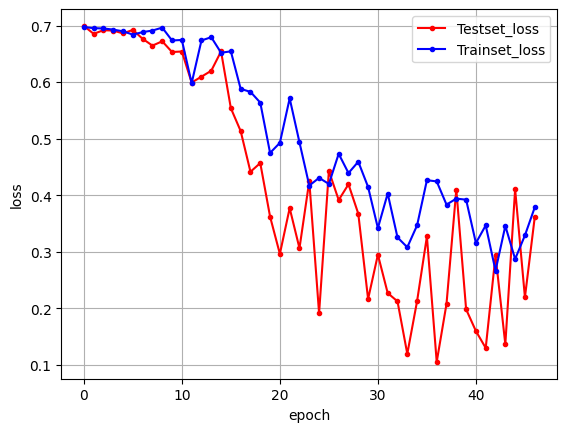

In [7]:
# 검증셋과 학습셋의 오차 저장

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

전이 학습 (Transfer Learning)

In [8]:
from tensorflow.keras.applications import VGG16

In [9]:
transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))
#  include_top=False : 가져온 모델의 마지막 분류기는 사용하지 않음
transfer_model.trainable = False
# 가져온 모델을 훈련 시키지 않음(있는 그대로 사용)
transfer_model.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [10]:
finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64, activation='relu'))
finetune_model.add(Dense(1, activation='sigmoid'))

finetune_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                524352    
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 15239105 (58.13 MB)
Trainable params: 524417 (2.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [11]:
# 모델 실행
finetune_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.0002),
              metrics=['accuracy'])


# 학습 조기 중단
Ealry_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델 실행
history = finetune_model.fit(
    train_generator,
    epochs=100,
    validation_data = test_generator,
    validation_steps = 10,
    callbacks = [Ealry_stopping_callback]
)

Epoch 1/100
32/32 [==============================] - 3s 37ms/step - loss: 0.7730 - accuracy: 0.5000 - val_loss: 0.6253 - val_accuracy: 0.5200
Epoch 2/100
32/32 [==============================] - 1s 32ms/step - loss: 0.6752 - accuracy: 0.5875 - val_loss: 0.5469 - val_accuracy: 0.6800
Epoch 3/100
32/32 [==============================] - 1s 32ms/step - loss: 0.6353 - accuracy: 0.6062 - val_loss: 0.5494 - val_accuracy: 0.7400
Epoch 4/100
32/32 [==============================] - 1s 31ms/step - loss: 0.6135 - accuracy: 0.6187 - val_loss: 0.5182 - val_accuracy: 0.7600
Epoch 5/100
32/32 [==============================] - 1s 30ms/step - loss: 0.5750 - accuracy: 0.6938 - val_loss: 0.4612 - val_accuracy: 0.8400
Epoch 6/100
32/32 [==============================] - 1s 31ms/step - loss: 0.5863 - accuracy: 0.6938 - val_loss: 0.4145 - val_accuracy: 0.8600
Epoch 7/100
32/32 [==============================] - 1s 31ms/step - loss: 0.5813 - accuracy: 0.6812 - val_loss: 0.3943 - val_accuracy: 0.9000
Epoch 

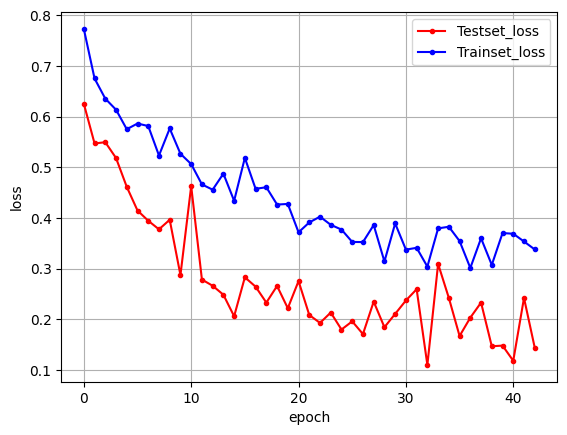

In [12]:
# 검증셋과 학습셋의 오차 저장

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()